# Checking Model Reproducibility Using Author's Implementation

In [ ]:
#Install rdkit

!pip install rdkit

In [ ]:
#Install SolTraNnet

!pip install soltrannet

In [ ]:
## Mount google drive
from google.colab import drive

drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing necessary libraries

import pandas as pd
import numpy as np

In [ ]:
#reading the dataset

aqsol = pd.read_csv("/content/drive/MyDrive/Ersilia/aqsol.csv")
aqsol

,smiles,y
0,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127
1,O=C1Nc2cccc3cccc1c23,-3.254767
2,Clc1ccc(C=O)cc1,-2.177078
3,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409
4,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065
...,...,...
9977,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000
9978,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000
9979,c1(cc(ccc1C(C)C)C)O,-2.190000
9980,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.980000


In [ ]:
#reading the dataset

esol = pd.read_csv("/content/drive/MyDrive/Ersilia/esol.csv")
esol

,smiles,y
0,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,1.088088
1,Cc1occc1C(=O)Nc2ccccc2,-0.119254
2,CC(C)=CCCC(C)=CC(=O),0.472487
3,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-2.300105
4,c1ccsc1,0.820851
...,...,...
1123,FC(F)(F)C(Cl)Br,0.639511
1124,CNC(=O)ON=C(SC)C(=O)N(C)C,1.506125
1125,CCSCCSP(=S)(OC)OC,-0.019517
1126,CCC(C)C,-0.061989


Predictions for aqsol dataset did not produce same result as the author

In [ ]:
#making predictions with smiles in dataset

import soltrannet as stn
my_smiles=aqsol['smiles']
predictions= list (stn.predict(my_smiles))

predictions

/usr/local/lib/python3.10/dist-packages/soltrannet/data_utils.py:207: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  return [torch.FloatTensor(adjacency_list), torch.FloatTensor(features_list), smiles_list, index_list]
[17:00:41] WARNING: not removing hydrogen atom without neighbors
[17:00:41] WARNING: not removing hydrogen atom without neighbors
[17:00:41] WARNING: not removing hydrogen atom without neighbors
[17:00:42] WARNING: not removing hydrogen atom without neighbors
[17:00:42] WARNING: not removing hydrogen atom without neighbors
[17:00:42] WARNING: not removing hydrogen atom without neighbors
[17:00:42] WARNING: not removing hydrogen atom without neighbors
[17:00:42] WARNING: not removing hydrogen atom without neighbors
[17:00:42] WARNING: not removing hydrogen atom w

[(-2.4987730979919434,
  '[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C',
  'Salt Detected Prediction less reliable'),
 (-3.3915863037109375, 'O=C1Nc2cccc3cccc1c23', ''),
 (-1.8787500858306885, 'Clc1ccc(C=O)cc1', ''),
 (-5.953376770019531,
  '[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)C([O-])=O.CC(c4ccccc4)c5cc(C(C)c6ccccc6)c(O)c(c5)C([O-])=O',
  'Salt Other-typed Atom(s) Detected Prediction less reliable'),
 (-2.7192585468292236,
  'C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO6)cc3',
  ''),
 (-2.7597239017486572, 'Cc1cccc(C=C)c1', ''),
 (-2.1603429317474365, 'CCC1CCC(CCC(O)=O)C1', ''),
 (-2.3360958099365234,
  'CC12CC(O)C3C(CCC4=CC(=O)C=CC34C)C1CC(O)C2(O)C(=O)CO',
  ''),
 (-4.364988327026367, 'Fc1ccc(cc1)C(=O)c2ccc(F)cc2', ''),
 (-4.11931037902832, 'O=C(OCCCOCCCOC(=O)c1ccccc1)c2ccccc2', ''),
 (-1.2006211280822754, 'CN(C)c1ccc(C=O)cc1', ''),
 (-2.790048360824585, 'CC(=O)OC(C)(C)Cc1ccccc1', ''),
 (-8.278055191040039,
  'Cc1ccc(O)c(C)c1.Cc2ccc(C)c(O)c2.Cc3cc(C)cc(O)c3.Cc4ccc(O)cc4C.Cc5cccc(O)

The predictions for aqsol dataset did not produce same result as the author

In [ ]:
#Importing matplotlib to create chart

import matplotlib.pyplot as plt

#Reading in the dataset for esol and aqsol and display minimum and mazimum value from aqsol data
esol_data=pd.read_csv('/content/drive/MyDrive/Ersilia/esol.csv')['y'].tolist()
#esol_data=[unstandardize(x) for x in esol_data]
aqsol_data=pd.read_csv('/content/drive/MyDrive/Ersilia/aqsol.csv')['y'].tolist()
print(min(aqsol_data),max(aqsol_data))

-13.1719 2.13768162


Text(0.5, 0, 'Solubility  (logS)')

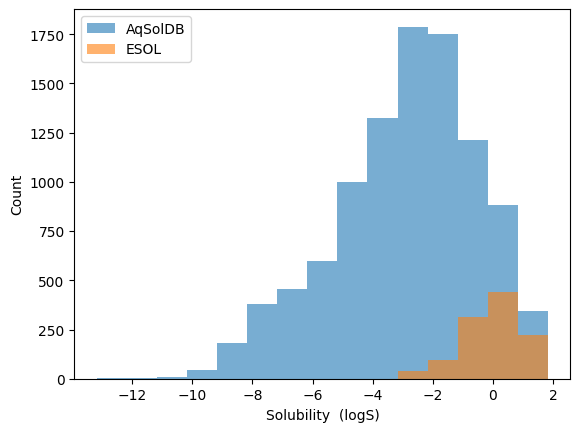

In [ ]:
bins=list(np.arange(-13.1719,2.138))

#plotting histogram chart with esol and aqsol data

plt.hist(aqsol_data, bins=bins,alpha=0.6,label='AqSolDB')
plt.hist(esol_data,bins=bins,alpha=0.6,label='ESOL')
plt.legend()
plt.ylabel('Count')
plt.xlabel('Solubility  (logS)')


# Using the Ersilia Model Hub to Predict Smiles in aqsol Dataset and Histogram Plot:

In [ ]:
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

In [ ]:
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX


--2024-03-21 17:05:12--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>] 100.13M   147MB/s    in 0.7s    

2024-03-21 17:05:13 (147 MB/s) - ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’ saved [104996770/104996770]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / done

# All requested packages already installed.

installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    

In [ ]:
!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
!python -m pip install pandas
!rm $MINICONDA_INSTALLER_SCRIPT
import sys

  Cloning https://github.com/ersilia-os/ersilia.git to /tmp/pip-req-build-cvxpecmo
  Running command git clone -q https://github.com/ersilia-os/ersilia.git /tmp/pip-req-build-cvxpecmo
  Resolved https://github.com/ersilia-os/ersilia.git to commit ede7206c99bdc7315c71874e2704bb76a3110aaa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [ ]:
## Mount google drive
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# specify your input folder

input_folder = "/content/drive/MyDrive/Ersilia"  # @param {type:"string"}

In [ ]:
# specify your output folder

output_folder = "/content/drive/MyDrive/Ersilia"  # @param {type:"string"}

In [ ]:
# specify the name of your input csv file

input_filename = "aqsol"  # @param {type:"string"}


In [ ]:
# specify the SMILES column name
smiles_column = "smiles"  # @param {type:"string"}


In [ ]:
# @title 🔤 Extract SMILES to a list
import pandas as pd

path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")

My dataset contains 9982 SMILES


In [ ]:
# Enter the model name
# This is just an example, make sure to adapt it to your specific model

model_name = "eos6oli"  # @param {type:"string"}

In [ ]:
# @title 📥 Fetch the model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
[]
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:51061
   PID: 74505
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
⛔ Model eos6oli closed
👍 Model eos6oli fetched successfully!
Time taken: 194.46 seconds


In [ ]:
# @title ⚙️ Serve the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name


sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:39455
   PID: 74762
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


In [ ]:
# @title ⚡ Run predictions
api = "calculate"  # @param {type:"string"}

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 618.14 seconds


In [ ]:
# @title ✔️ Check your results

print(output.head())

                           key  \
0  SZEMGTQCPRNXEG-UHFFFAOYSA-M   
1  GPYLCFQEKPUWLD-UHFFFAOYSA-N   
2  AVPYQKSLYISFPO-UHFFFAOYSA-N   
3  XTUPUYCJWKHGSW-UHFFFAOYSA-L   
4  FAUAZXVRLVIARB-UHFFFAOYSA-N   

                                               input  solubility  
0                [Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C      -2.499  
1                               O=C1Nc2cccc3cccc1c23      -3.392  
2                                    Clc1ccc(C=O)cc1      -1.879  
3  [Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...      -5.953  
4  C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...      -2.719  


# Reproducing Chart from Result in the Publication

In [ ]:
#Importing matplotlib to create chart

import matplotlib.pyplot as plt

#Reading in the dataset for esol and aqsol and display minimum and mazimum value from aqsol data
esol_data=pd.read_csv('/content/drive/MyDrive/Ersilia/esol.csv')['y'].tolist()
#esol_data=[unstandardize(x) for x in esol_data]
aqsol_data=pd.read_csv('/content/drive/MyDrive/Ersilia/aqsol.csv')['y'].tolist()
print(min(aqsol_data),max(aqsol_data))

-13.1719 2.13768162


Text(0.5, 0, 'Solubility  (logS)')

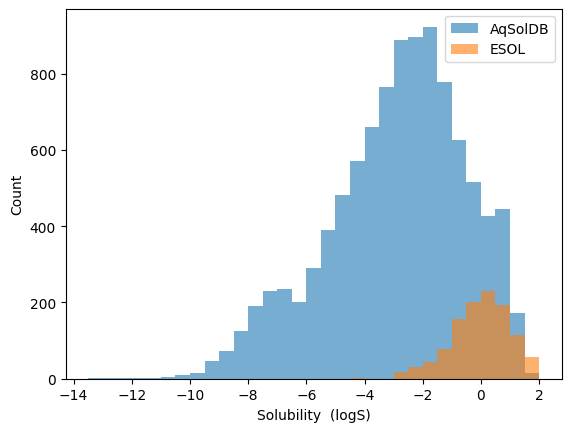

In [ ]:

bins=list(np.arange(-13.5,2.5,.5))

#plotting histogram chart with esol and aqsol data

plt.hist(aqsol_data, bins=bins,alpha=0.6,label='AqSolDB')
plt.hist(esol_data,bins=bins,alpha=0.6,label='ESOL')
plt.legend()
plt.ylabel('Count')
plt.xlabel('Solubility  (logS)')


From the result gotten from Ersilia model is different from the result produced by the author, this clearly shows that the model is not reproducible.